<p style="align: center;"><img align=center src="https://drive.google.com/uc?export=view&id=1I8kDikouqpH4hf7JBiSYAeNT2IO52T-T" width=600 height=480/></p>
<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Сегментация изображений</b></h3>


В этом задании вам предстоит решить задачу сегментации медицинских снимков. Часть кода с загрузкой данных написана за вас. Всю содержательную сторону вопроса вам нужно заполнить самостоятельно. Задание оценивается из 15 баллов. 

Обратите внимание, что отчёт по заданию стоит целых 6 баллов. Он вынесен в отдельный пункт в конце тетради. Это сделано для того, чтобы тетрадь была оформлена как законченный документ о проведении экспериментов. Неотъемлемой составляющей отчёта является ответ на следующие вопросы:

* Что было сделано? Что получилось реализовать, что не получилось?
* Какие результаты ожидалось получить?
* Какие результаты были достигнуты?
* Чем результаты различных подходов отличались друг от друга и от бейзлайна (если таковой присутствует)?




---


1. Для начала мы скачаем датасет: [ADDI project](https://www.fc.up.pt/addi/ph2%20database.html).

<table><tr><td>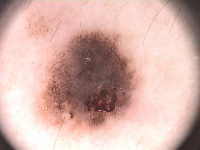</td><td>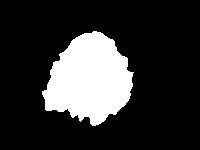</td></tr></table>

2. Разархивируем .rar файл.
3. Обратите внимание, что папка  `PH2 Dataset images` должна лежать там же где и ipynb notebook.

Это фотографии двух типов **поражений кожи:** меланома и родинки.
В данном задании мы не будем заниматься их классификацией, а будем **сегментировать** их.

In [ ]:
!wget -c https://www.dropbox.com/s/8lqrloi0mxj2acu/PH2Dataset.rar

--2022-11-27 12:37:56--  https://www.dropbox.com/s/8lqrloi0mxj2acu/PH2Dataset.rar
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/8lqrloi0mxj2acu/PH2Dataset.rar [following]
--2022-11-27 12:37:57--  https://www.dropbox.com/s/raw/8lqrloi0mxj2acu/PH2Dataset.rar
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce60b4439b1ff37dde0a6df1e6a.dl.dropboxusercontent.com/cd/0/inline/BxglJ06lV08GqnuuQZ9VEGB6BRfJcKAErU6noYQUo1JR0gxH19Rmxki9MaEEc0OkbHbvVtfBExfpvAUT1S_VDGEmdWARJLg9ze-lGW6Lhdyc_lQaHzpaGr4DYV_GBnovJ-TKlZkUzYkqPFAGSCWKXHTBe80op1j4JYmX-Vh_S3S_GA/file# [following]
--2022-11-27 12:37:57--  https://uce60b4439b1ff37dde0a6df1e6a.dl.dropboxusercontent.com/cd/0/inline/BxglJ06lV08GqnuuQZ9VEGB6BRfJcKAErU6noYQUo1JR0gxH19Rmxki9MaEEc0OkbHbvVtfBEx

In [ ]:
!ls

PH2Dataset  PH2Dataset.rar  sample_data


In [ ]:
get_ipython().system_raw("unrar x PH2Dataset.rar")

Стуктура датасета у нас следующая:

    IMD_002/
        IMD002_Dermoscopic_Image/
            IMD002.bmp
        IMD002_lesion/
            IMD002_lesion.bmp
        IMD002_roi/
            ...
    IMD_003/
        ...
        ...

 Здесь `X.bmp` — изображение, которое нужно сегментировать, `X_lesion.bmp` — результат сегментации.

Для загрузки датасета можно использовать skimage: [`skimage.io.imread()`](https://scikit-image.org/docs/dev/api/skimage.io.html)

In [ ]:
images = []
lesions = []
from skimage.io import imread
import os
root = 'PH2Dataset'

for root, dirs, files in os.walk(os.path.join(root, 'PH2 Dataset images')):
    if root.endswith('_Dermoscopic_Image'):
        images.append(imread(os.path.join(root, files[0])))
    if root.endswith('_lesion'):
        lesions.append(imread(os.path.join(root, files[0])))

Изображения имеют разные размеры. Давайте изменим их размер на $256\times256 $ пикселей. Для изменения размера изображений можно использовать [`skimage.transform.resize()`](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize).
Эта функция также автоматически нормализует изображения в диапазоне $[0,1]$.


In [ ]:
from skimage.transform import resize
size = (256, 256)
X = [resize(x, size, mode='constant', anti_aliasing=True,) for x in images]
Y = [resize(y, size, mode='constant', anti_aliasing=False) > 0.5 for y in lesions]

In [ ]:
import numpy as np
X = np.array(X, np.float32)
Y = np.array(Y, np.float32)
print(f'Loaded {len(X)} images')

Loaded 200 images


In [ ]:
len(lesions)

200

Чтобы убедиться, что все корректно, мы нарисуем несколько изображений

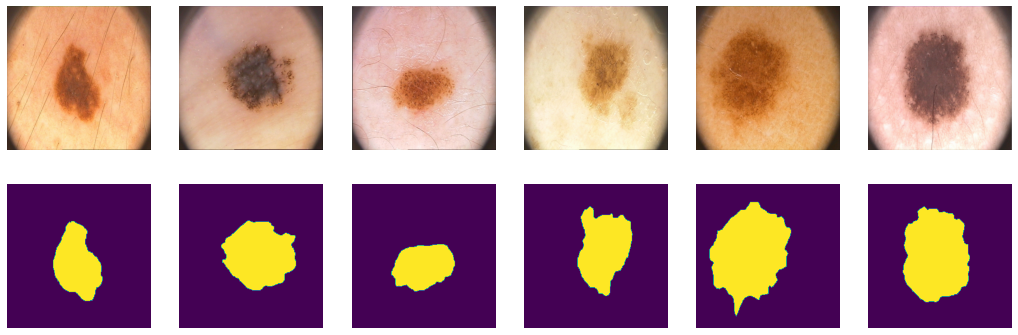

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.figure(figsize=(18, 6))
for i in range(6):
    plt.subplot(2, 6, i+1)
    plt.axis("off")
    plt.imshow(X[i])

    plt.subplot(2, 6, i+7)
    plt.axis("off")
    plt.imshow(Y[i])
plt.show();

Разделим наши 200 картинок на 100/50/50
 для обучения, валидации и теста соответственно

In [ ]:
ix = np.random.choice(len(X), len(X), False)
tr, val, ts = np.split(ix, [100, 150])

In [ ]:
print(len(tr), len(val), len(ts))

100 50 50


#### PyTorch DataLoader

In [ ]:
from torch.utils.data import DataLoader
batch_size = 25
data_tr = DataLoader(list(zip(np.rollaxis(X[tr], 3, 1), Y[tr, np.newaxis])), 
                     batch_size=batch_size, shuffle=True)
data_val = DataLoader(list(zip(np.rollaxis(X[val], 3, 1), Y[val, np.newaxis])),
                      batch_size=batch_size, shuffle=True)
data_ts = DataLoader(list(zip(np.rollaxis(X[ts], 3, 1), Y[ts, np.newaxis])),
                     batch_size=batch_size, shuffle=True)

In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Реализация различных архитектур:
Ваше задание будет состоять в том, чтобы написать несколько нейросетевых архитектур для решения задачи семантической сегментации. Сравнить их по качеству на тесте и испробовать различные лосс функции для них.

-----------------------------------------------------------------------------------------

# SegNet [2 балла]

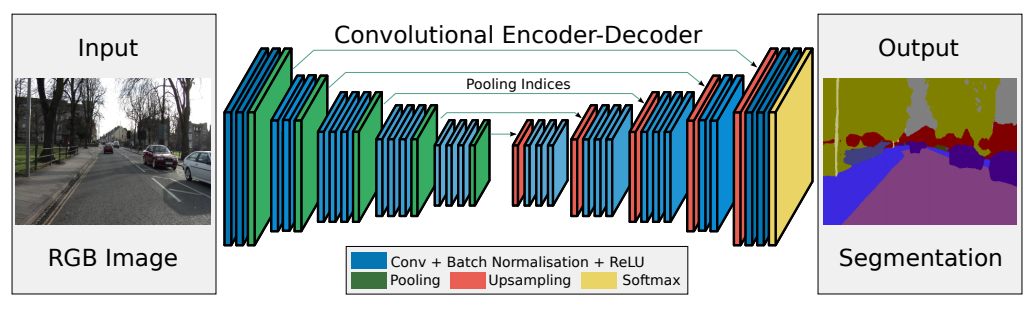

* Badrinarayanan, V., Kendall, A., & Cipolla, R. (2015). [SegNet: A deep convolutional
encoder-decoder architecture for image segmentation](https://arxiv.org/pdf/1511.00561.pdf)

Внимательно посмотрите из чего состоит модель и для чего выбраны те или иные блоки.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import torch.optim as optim
from time import time

from matplotlib import rcParams
rcParams['figure.figsize'] = (15,4)

In [ ]:
X.shape

(200, 256, 256, 3)

In [ ]:
inp_channel = 3
out_channel = 1

In [ ]:
class SegNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )
        self.enc_conv0 = nn.Sequential(nn.Conv2d(inp_channel, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU(),
                                        nn.Conv2d(8, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU())
        self.pool0 = nn.MaxPool2d(2, 2, return_indices=True) # 256 -> 128
        self.enc_conv1 = nn.Sequential(nn.Conv2d(8, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU(),
                                        nn.Conv2d(16, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU())
        self.pool1 = nn.MaxPool2d(2, 2, return_indices=True) # 128 -> 64
        self.enc_conv2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU())
        self.pool2 = nn.MaxPool2d(2, 2, return_indices=True)# 64 -> 32
        self.enc_conv3 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU())
        self.pool3 = nn.MaxPool2d(2, 2,  return_indices=True)# 32 -> 16

        # bottleneck
        #self.bottleneck_conv = nn.Conv2d(256, 128, kernel_size=1)

        # decoder (upsampling)
        self.upsample0 = nn.MaxUnpool2d(2, 2)# 16 -> 32
        self.dec_conv0 = nn.Sequential(nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU())
        self.upsample1 = nn.MaxUnpool2d(2, 2)# 32 -> 64
        self.dec_conv1 = nn.Sequential(nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU())
        self.upsample2 =  nn.MaxUnpool2d(2, 2)# 64 -> 128
        self.dec_conv2 = nn.Sequential(nn.Conv2d(16, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU(),
                                        nn.Conv2d(16, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU())
        self.upsample3 =  nn.MaxUnpool2d(2, 2)# 128 -> 256
        self.dec_conv3 = nn.Sequential(nn.Conv2d(8, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU(),
                                        nn.Conv2d(8, out_channel, kernel_size=3, padding=1))

    def forward(self, x):
        # encoder
        e0, idx0 = self.pool0(self.enc_conv0(x))
        e1, idx1 = self.pool1(self.enc_conv1(e0))
        e2, idx2 = self.pool2(self.enc_conv2(e1))
        e3, idx3 = self.pool3(self.enc_conv3(e2))

        # bottleneck
        #b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(self.upsample0(e3, idx3))
        d1 = self.dec_conv1(self.upsample1(d0, idx2))
        d2 = self.dec_conv2(self.upsample2(d1, idx1))
        d3 = self.dec_conv3(self.upsample3(d2, idx0))  # no activation
        return d3

## Метрика

В данном разделе предлагается использовать следующую метрику для оценки качества:

$I o U=\frac{\text {target } \cap \text { prediction }}{\text {target } \cup{prediction }}$

Пересечение (A ∩ B) состоит из пикселей, найденных как в маске предсказания, так и в основной маске истины, тогда как объединение (A ∪ B) просто состоит из всех пикселей, найденных либо в маске предсказания, либо в целевой маске.


Для примера посмотрим на истину (слева) и предсказание (справа):
![alt text](https://www.jeremyjordan.me/content/images/2018/05/target_prediction.png)


Тогда пересечение и объединение будет выглядеть так:

![alt text](https://www.jeremyjordan.me/content/images/2018/05/intersection_union.png)

In [ ]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(1).byte()  # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0
    
    thresholded = torch.clamp(20 * (iou - 0.5), 0, 10).ceil() / 10  # This is equal to comparing with thresolds
    
    return thresholded  # 

## Функция потерь [1 балл]

Не менее важным, чем построение архитектуры, является определение **оптимизатора** и **функции потерь.**

Функция потерь - это то, что мы пытаемся минимизировать. Многие из них могут быть использованы для задачи бинарной семантической сегментации. 

Популярным методом для бинарной сегментации является *бинарная кросс-энтропия*, которая задается следующим образом:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

где $y$ это  таргет желаемого результата и $\hat y$ является выходом модели. $\sigma$ - это [*логистическая* функция](https://en.wikipedia.org/wiki/Sigmoid_function), который преобразует действительное число $\mathbb R$ в вероятность $[0,1]$.

Однако эта потеря страдает от проблем численной нестабильности. Самое главное, что $\lim_{x\rightarrow0}\log(x)=\infty$ приводит к неустойчивости в процессе оптимизации. Рекомендуется посмотреть следующее [упрощение](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits). Эта функция эквивалентна первой и не так подвержена численной неустойчивости:

$$\mathcal L_{BCE} = \hat y - y\hat y + \log\left(1+\exp(-\hat y)\right).$$

In [ ]:
def bce_loss(y_real, y_pred):
    # TODO 
    # please don't use nn.BCELoss. write it from scratch

    return torch.mean(y_pred - y_real*y_pred + torch.log(1 + torch.exp(-y_pred)))

## Тренировка [1 балл]

Мы определим цикл обучения в функции, чтобы мы могли повторно использовать его.

In [ ]:
def train(model, opt, loss_fn, epochs, data_tr, data_val):
    X_val, Y_val = next(iter(data_val))
    tr_loss = []
    val_loss = []

    for epoch in range(epochs):
        tic = time()
        print('* Epoch %d/%d' % (epoch+1, epochs))

        avg_loss = 0
        model.train()  # train mode
        for X_batch, Y_batch in data_tr:
            # data to device
            X_batch = X_batch.to(device)
            # set parameter gradients to zero
            opt.zero_grad()

            # forward
            Y_pred = model(X_batch)
            loss = loss_fn(Y_batch.to(device), Y_pred) # forward-pass
            loss.backward()  # backward-pass
            opt.step()  # update weights

            # calculate loss to show the user
            avg_loss += loss / len(data_tr)
        val_loss_ep = loss_fn(Y_val.to(device), model(X_val.to(device)))
        toc = time()
        print('loss: %f' % avg_loss)
        val_loss.append(float(val_loss_ep))
        tr_loss.append(float(avg_loss))
        
        # show intermediate results
        model.eval()  # testing mode
        Y_hat = model(X_val.to(device)).detach().cpu()# detach and put into cpu

        # Visualize tools
        clear_output(wait=True)
        for k in range(6):
            plt.subplot(2, 6, k+1)
            plt.imshow(np.rollaxis(X_val[k].numpy(), 0, 3), cmap='gray')
            plt.title('Real')
            plt.axis('off')

            plt.subplot(2, 6, k+7)
            plt.imshow(Y_hat[k, 0], cmap='gray')
            plt.title('Output')
            plt.axis('off')
        plt.suptitle('%d / %d - loss: %f' % (epoch+1, epochs, avg_loss))
        plt.show()

    return tr_loss, val_loss

## Инференс [1 балл]

После обучения модели эту функцию можно использовать для прогнозирования сегментации на новых данных:

In [ ]:
def predict(model, data):
    model.eval()  # testing mode
    Y_pred = [ X_batch for X_batch, _ in data]
    return np.array(Y_pred)

In [ ]:
def score_model(model, metric, data, threshold):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = torch.sigmoid(model(X_batch.to(device))) > threshold
        scores += metric(Y_pred, Y_label.to(device)).mean().item()

    return scores/len(data)

## Основной момент: обучение

Обучите вашу модель. Обратите внимание, что обучать необходимо до сходимости. Если указанного количества эпох (20) не хватило, попробуйте изменять количество эпох до сходимости алгоритма. Сходимость определяйте по изменению функции потерь на валидационной выборке.
 С параметрами оптимизатора можно спокойно играть, пока вы не найдете лучший вариант для себя.


In [ ]:
model = SegNet().to(device)

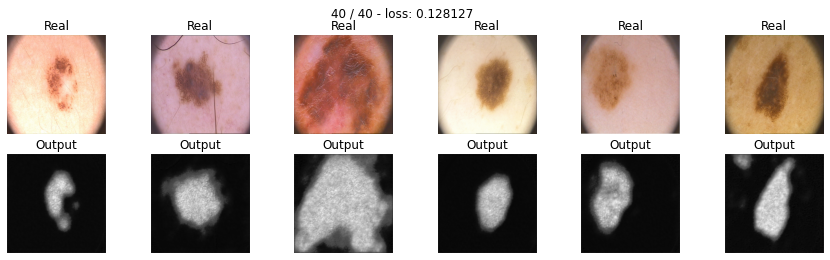

In [ ]:
max_epochs = 40
opt = optim.Adam(model.parameters())
seg_bce_tr_loss, seg_bce_val_loss = train(model, opt, bce_loss, max_epochs, data_tr, data_val)

In [ ]:
#torch.cuda.empty_cache()

In [ ]:
seg_bce_val = score_model(model, iou_pytorch, data_val, 0.5)

In [ ]:
seg_bce_tr = score_model(model, iou_pytorch, data_tr, 0.5)

Ответьте себе на вопрос: не переобучается ли моя модель?

-----------------------------------------------------------------------------------------

## Дополнительные функции потерь [2 балла] 

 В данном разделе вам потребуется имплементировать две функции потерь:
 DICE и Focal loss. 
 Если у вас что-то не учится, велика вероятность, что вы ошиблись или учите слишком мало эпох, прежде чем бить тревогу попробуйте перебрать различные варианты и убедитесь, что во всех других сетапах сеть достигает желанного результата. СПОЙЛЕР: учиться она будет при всех лоссах, предложенных в этом задании.


**1. Dice coefficient:** Учитывая две маски $X$ и $Y$, общая метрика для измерения расстояния между этими двумя масками задается следующим образом:

$$D(X,Y)=\frac{2|X\cap Y|}{|X|+|Y|}$$

Эта функция не является дифференцируемой, но это необходимое свойство для градиентного спуска. В данном случае мы можем приблизить его с помощью:

$$\mathcal L_D(X,Y) = 1-\frac{1}{256 \times 256} \times \frac{\sum_i2X_iY_i}{\sum_iX_i+Y_i}.$$

Не забудьте подумать о численной нестабильности, возникающей в математической формуле.


In [ ]:
def dice_loss(y_real, y_pred):
    y_pred = torch.sigmoid(y_pred)
    num = torch.sum(2 * y_real * y_pred) 
    den = 256 * 256 * torch.sum(y_real + y_pred)
    res = 1 - num / den
    return res 

Проводим тестирование:

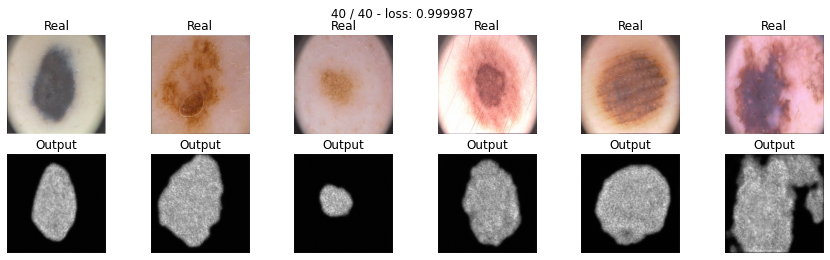

In [ ]:
model_dice = SegNet().to(device)

max_epochs = 40
optimaizer = optim.Adam(model_dice.parameters())
seg_dice_tr_loss, seg_dice_val_loss = train(model_dice, optimaizer, dice_loss, max_epochs, data_tr, data_val)

In [ ]:
seg_dice_val = score_model(model_dice, iou_pytorch, data_val, 0.5)

In [ ]:
seg_dice_tr = score_model(model_dice, iou_pytorch, data_tr, 0.5)

[**2. Focal loss:**](https://arxiv.org/pdf/1708.02002.pdf) 

Окей, мы уже с вами умеем делать BCE loss:

$$\mathcal L_{BCE}(y, \hat y) = -\sum_i \left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Проблема с этой потерей заключается в том, что она имеет тенденцию приносить пользу классу **большинства** (фоновому) по отношению к классу **меньшинства** ( переднему). Поэтому обычно применяются весовые коэффициенты к каждому классу:

$$\mathcal L_{wBCE}(y, \hat y) = -\sum_i \alpha_i\left[y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Традиционно вес $\alpha_i$ определяется как обратная частота класса этого пикселя $i$, так что наблюдения миноритарного класса весят больше по отношению к классу большинства.

Еще одним недавним дополнением является взвешенный пиксельный вариант, которая взвешивает каждый пиксель по степени уверенности, которую мы имеем в предсказании этого пикселя.

$$\mathcal L_{focal}(y, \hat y) = -\sum_i \left[\left(1-\sigma(\hat y_i)\right)^\gamma y_i\log\sigma(\hat y_i) + (1-y_i)\log(1-\sigma(\hat y_i))\right].$$

Зафиксируем значение $\gamma=2$.

--------------------------------------------------------------------------------


In [ ]:
def focal_loss(y_real, y_pred, eps = 1e-8, gamma = 2):
    y_pred = torch.clamp(torch.sigmoid(y_pred), eps, 1) # hint: torch.clamp
    return -torch.sum(y_real*torch.log(y_pred)*(1 - y_pred)**gamma + (1-y_real)*torch.log(1 - y_pred))


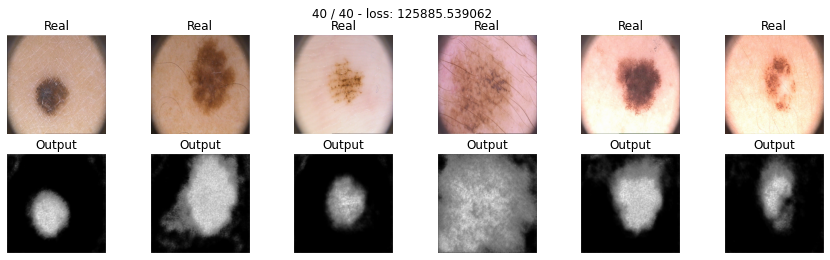

In [ ]:
model_focal = SegNet().to(device)

max_epochs = 40
optimaizer = optim.Adam(model_focal.parameters())
seg_focal_tr_loss, seg_focal_val_loss = train(model_focal, optimaizer, focal_loss, max_epochs, data_tr, data_val)

In [ ]:
seg_focal_val = score_model(model_focal, iou_pytorch, data_val, 0.6)

In [ ]:
seg_focal_tr = score_model(model_focal, iou_pytorch, data_tr, 0.55)

----------------------------------------------------------------------------------------------

## [BONUS] Мир сегментационных лоссов [5 баллов]

В данном блоке предлагаем вам написать одну функцию потерь самостоятельно. Для этого необходимо прочитать статью и имплементировать ее. Кроме тако провести численное сравнение с предыдущими функциями.
Какие варианты? 

1) Можно учесть Total Variation
2) Lova
3) BCE но с Soft Targets (что-то типа label-smoothing для многослассовой классификации)
4) Любой другой 

* [Physiological Inspired Deep Neural Networks for Emotion Recognition](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=8472816&tag=1)". IEEE Access, 6, 53930-53943.

* [Boundary loss for highly unbalanced segmentation](https://arxiv.org/abs/1812.07032)

* [Tversky loss function for image segmentation using 3D fully convolutional deep networks](https://arxiv.org/abs/1706.05721)

* [Correlation Maximized Structural Similarity Loss for Semantic Segmentation](https://arxiv.org/abs/1910.08711)

* [Topology-Preserving Deep Image Segmentation](https://papers.nips.cc/paper/8803-topology-preserving-deep-image-segmentation)

Так как Тверский лосс очень похож на данные выше, то за него будет проставлено только 3 балла (при условии, если в модели нет ошибок при обучении). Постарайтесь сделать что-то интереснее.

Реализуем Lova loss

В качестве входных данных подаются реальные значения и выходы модели без функции активации.
Для начала считаем ошибку. Эта ошибка положительна, когда знаки не совпали(те предсказания неверные) и отрицательная, когда совпали, после чего смещаем ее на 1. Мы должны уметь посчитать производную по знаку значений, поэтому добавляем к переменным, по которым считаем производную.

Затем сортируем правильные значения по нашим ошибкам. и считаем по ним кумулятивно индекс жаккара, те сначала по 1 картинке, потом по первым 2 и тд, в конце по всем картинкам. Т.е. считаем отношение пересечния и обьединения по соответствующему числу верных картинок с начала(при сортировке по убыванию, те сначала картинки с наибольшей ошибкой errors. 

Затем считаем коэффициент Ловаса по этому вектору.
```
 jaccard[1:p] - jaccard[0:-1]
```
А затем считаем лосс как матричное произведение ошибок по выходам модели на соответствующий коэффициент Ловаса. Только занулим правильные ответы(те там где ошибка отрицательная) с помощью ReLU. 



In [ ]:
from torch.autograd import Variable

def lova_loss(y_real, y_pred):
  signs = 2. * y_real.float() - 1.
  errors = 1. - y_pred * Variable(signs)
  err_sort, perm = torch.sort(errors, 0, descending=True)
  new_y_true = y_real[perm.data]
  gts = new_y_true.sum()
  intersection = gts - new_y_true.float().cumsum(0)
  union = gts + (1 - new_y_true).float().cumsum(0)
  jaccard = 1. - intersection / union
  # сейчас тут вектор с индексами жаккара по соответствующей кумулятивной сумме
  jaccard[1:len(new_y_true)] = jaccard[1:len(new_y_true)] - jaccard[0:-1]
  return torch.dot(F.relu(err_sort), Variable(jaccard))

Ну а теперь посмотрим на работу модели

In [ ]:
model_lova = SegNet().to(device)

max_epochs = 40
optimaizer = optim.Adam(model_lova.parameters())
train(model_lova, optimaizer, lova_loss, max_epochs, data_tr, data_val)

In [ ]:
score_model(model_lova, iou_pytorch, data_val, 0.9)

К сожалению не получается запустить. Не хватает оперативной памяти для хранения всех кумулятивных сумм. 

Попробую реализовать boundary loss.

Этот лосс учитывает, как понятно из названия, расстояния до границ областей классов.

Для начала функция перевода вероятностей(после сигмоиды в классы).

In [ ]:
def probs2class(probs, threshold):
  return probs > threshold 

Теперь функция подсчета карты расстояний до границ.

Функция принимает значения после предыдущей функции и размер матрицы без batch_size. 

Функция distance_transform_edt считает кратчайшее растояние до фоновой точки(со значением 0).

In [ ]:
from scipy.ndimage import distance_transform_edt as eucl_distance

In [ ]:
def class2dist(seg, resolution):
  if seg.any():
    return torch.tensor(eucl_distance(seg[:,0,:,:].cpu().numpy(), sampling=resolution)).to(device)
  return torch.zeros_like(seg).to(device)

In [ ]:
from torch import einsum

In [ ]:
def boundary_loss(probs, dist_maps):
  return einsum("bkwh,bkwh->bkwh", probs, dist_maps[:,None,:,:]).mean()
  # это тоже самое, что и попиксельное умножение карты расстояний полученной заранее и выходов модели
  # после чего берется среднее

In [ ]:
def boundary_with_logits_loss(y_real, y_pred):
  return boundary_loss(F.sigmoid(y_pred), class2dist(y_real, y_real.shape[1:]))

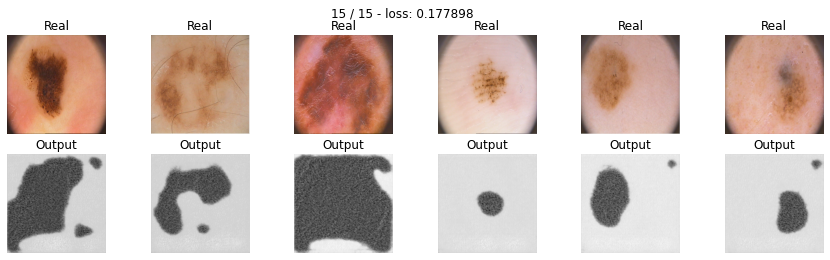

In [ ]:
model_boundary = SegNet().to(device)

max_epochs = 15
optimaizer = optim.Adam(model_boundary.parameters())
seg_boundary_tr_loss, seg_boundary_val_loss = train(model_boundary, optimaizer, boundary_with_logits_loss, max_epochs, data_tr, data_val)

In [ ]:
def score_model(model, metric, data, threshold):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = torch.sigmoid(model(X_batch.to(device))) < threshold
        scores += metric(Y_pred, Y_label.to(device)).mean().item()

    return scores/len(data)

In [ ]:
obj = next(iter(data_tr))

In [ ]:
preds = torch.sigmoid(model_boundary(obj[0].to(device)))

In [ ]:
preds[obj[1]==1].mean()

tensor(0.1409, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
preds[obj[1]==0].mean()

tensor(0.5215, device='cuda:0', grad_fn=<MeanBackward0>)

In [ ]:
score_model(model_boundary, iou_pytorch, data_val, 0.25)

0.45399998128414154

In [ ]:
score_model(model_boundary, iou_pytorch, data_tr, 0.25)

0.5249999985098839

В целом качество не очень хорошее. Я пробовал повышать число эпох. Начинается занижение среднего по целевому классу, качество растет незначительно, если менять порог. Но визиуально модель начинает работать хуже.
Из особенностей видно, что начинают лучше прорисовываться контуры. В некоторых картинках с тонкими "полосками" они прорисовываются. Находятся зоны внутри других зон и отделяются(это видно по белым пятнам внутри черных). Все это прослеживается в картинках выше(при запуске, в котором есть соответствующие особенности). Но в целом качество ухудшилось. 

-----------------------------------------------------------------------------------------

# U-Net [2 балла]

[**U-Net**](https://arxiv.org/abs/1505.04597) — это архитектура нейронной сети, которая получает изображение и выводит его. Первоначально он был задуман для семантической сегментации (как мы ее будем использовать), но он настолько успешен, что с тех пор используется в других контекстах. Получая на вход медицинское изображение, он выведет изображение в оттенках серого, где интенсивность каждого пикселя зависит от вероятности того, что этот пиксель принадлежит интересующей нас области.

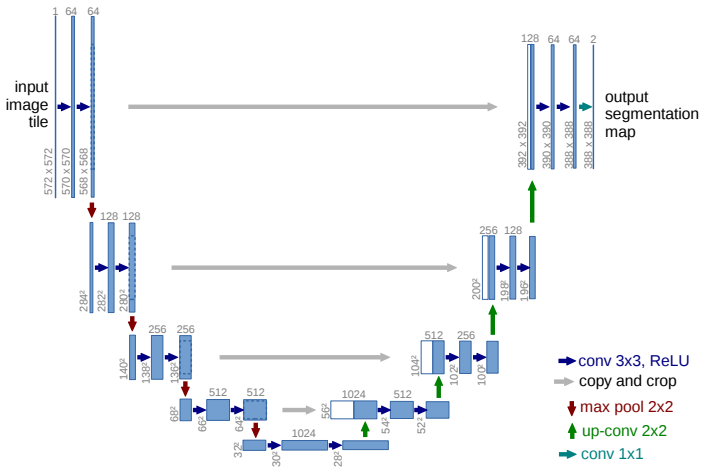

У нас в архитектуре все так же существует энкодер и декодер, как в **SegNet**, но отличительной особеностью данной модели являются *skip-conenctions*, соединяющие части декодера и энкодера. То есть для того чтобы передать на вход декодера тензор, мы конкатенируем симметричный выход с энкодера и выход предыдущего слоя декодера.

* Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "[U-Net: Convolutional networks for biomedical image segmentation.](https://arxiv.org/pdf/1505.04597.pdf)" International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.

In [ ]:
class UNet(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )
        self.enc_conv0 = nn.Sequential(nn.Conv2d(inp_channel, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU(),
                                        nn.Conv2d(8, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU())
        self.pool0 = nn.MaxPool2d(2, 2) # 256 -> 128
        self.enc_conv1 = nn.Sequential(nn.Conv2d(8, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU(),
                                        nn.Conv2d(16, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU())
        self.pool1 = nn.MaxPool2d(2, 2) # 128 -> 64
        self.enc_conv2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU())
        self.pool2 = nn.MaxPool2d(2, 2)# 64 -> 32
        self.enc_conv3 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU())
        self.pool3 = nn.MaxPool2d(2, 2)# 32 -> 16


        # bottleneck
        self.bottleneck_conv = nn.Sequential(nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU())

        # decoder (upsampling)
        self.upsample0 = nn.Upsample(32)# 16 -> 32
        self.dec_conv0 = nn.Sequential(nn.Conv2d(128, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU())
        self.upsample1 = nn.Upsample(64)# 32 -> 64
        self.dec_conv1 = nn.Sequential(nn.Conv2d(64, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU())
        self.upsample2 =  nn.Upsample(128)# 64 -> 128
        self.dec_conv2 =  nn.Sequential(nn.Conv2d(32, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU(),
                                        nn.Conv2d(16, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU())
        self.upsample3 =  nn.Upsample(256)# 128 -> 256
        self.dec_conv3 = nn.Sequential(nn.Conv2d(16, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU(),
                                        nn.Conv2d(8, out_channel, kernel_size=3, padding=1))
    def forward(self, x):
        # encoder
        e0_conv = self.enc_conv0(x)
        e0 = self.pool0(e0_conv)
        e1_conv = self.enc_conv1(e0)
        e1 = self.pool1(e1_conv)
        e2_conv = self.enc_conv2(e1)
        e2 = self.pool2(e2_conv)
        e3_conv = self.enc_conv3(e2)
        e3 = self.pool3(e3_conv)

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(torch.cat((e3_conv, self.upsample0(b)), dim=1))
        d1 = self.dec_conv1(torch.cat((e2_conv, self.upsample1(d0)), dim=1))
        d2 = self.dec_conv2(torch.cat((e1_conv, self.upsample2(d1)), dim=1))
        d3 = self.dec_conv3(torch.cat((e0_conv, self.upsample3(d2)), dim=1))  # no activation
        return d3

In [ ]:
unet_model = UNet().to(device)

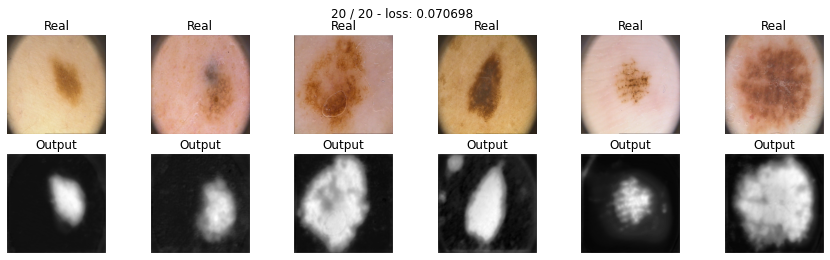

In [ ]:
unet_bce_tr_loss, unet_bce_val_loss = train(unet_model, optim.Adam(unet_model.parameters()), bce_loss, 20, data_tr, data_val)

In [ ]:
def score_model(model, metric, data, threshold):
    model.eval()  # testing mode
    scores = 0
    for X_batch, Y_label in data:
        Y_pred = torch.sigmoid(model(X_batch.to(device))) > threshold
        scores += metric(Y_pred, Y_label.to(device)).mean().item()

    return scores/len(data)

In [ ]:
unet_bce_val = score_model(unet_model, iou_pytorch, data_val, 0.5)

In [ ]:
unet_bce_tr = score_model(unet_model, iou_pytorch, data_tr, 0.5)

Новая модель путем изменения типа пулинга:

 **Max-Pooling** for the downsampling and **nearest-neighbor Upsampling** for the upsampling.

Down-sampling:

        conv = nn.Conv2d(3, 64, 3, padding=1)
        pool = nn.MaxPool2d(3, 2, padding=1)

Up-Sampling

        upsample = nn.Upsample(32)
        conv = nn.Conv2d(64, 64, 3, padding=1)

Замените max-pooling на convolutions с stride=2 и upsampling на transpose-convolutions с stride=2.


In [ ]:
class UNet2(nn.Module):
    def __init__(self):
        super().__init__()

        # encoder (downsampling)
        # Each enc_conv/dec_conv block should look like this:
        # nn.Sequential(
        #     nn.Conv2d(...),
        #     ... (2 or 3 conv layers with relu and batchnorm),
        # )
        self.enc_conv0 = nn.Sequential(nn.Conv2d(inp_channel, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU(),
                                        nn.Conv2d(8, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU())
        self.pool0 = nn.Conv2d(8, 8, kernel_size=3, stride=2, padding=1) #256 -> 128
        self.enc_conv1 = nn.Sequential(nn.Conv2d(8, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU(),
                                        nn.Conv2d(16, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU())
        self.pool1 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1) # 128 -> 64
        self.enc_conv2 = nn.Sequential(nn.Conv2d(16, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU())
        self.pool2 = nn.Conv2d(32, 32, kernel_size=3, stride=2, padding=1)# 64 -> 32
        self.enc_conv3 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU())
        self.pool3 = nn.Conv2d(64, 64, kernel_size=3, stride=2, padding=1)# 32 -> 16


        # bottleneck
        self.bottleneck_conv = nn.Sequential(nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU())

        # decoder (upsampling)
        self.upsample0 = nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2)# 16 -> 32
        self.dec_conv0 = nn.Sequential(nn.Conv2d(128, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.BatchNorm2d(64), nn.ReLU(),
                                        nn.Conv2d(64, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU())
        self.upsample1 = nn.ConvTranspose2d(32, 32, kernel_size=2, stride=2)# 32 -> 64
        self.dec_conv1 = nn.Sequential(nn.Conv2d(64, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 32, kernel_size=3, padding=1), nn.BatchNorm2d(32), nn.ReLU(),
                                        nn.Conv2d(32, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU())
        self.upsample2 =  nn.ConvTranspose2d(16, 16, kernel_size=2, stride=2)# 64 -> 128
        self.dec_conv2 =  nn.Sequential(nn.Conv2d(32, 16, kernel_size=3, padding=1), nn.BatchNorm2d(16), nn.ReLU(),
                                        nn.Conv2d(16, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU())
        self.upsample3 =  nn.ConvTranspose2d(8, 8, kernel_size=2, stride=2)# 128 -> 256
        self.dec_conv3 = nn.Sequential(nn.Conv2d(16, 8, kernel_size=3, padding=1), nn.BatchNorm2d(8), nn.ReLU(),
                                        nn.Conv2d(8, out_channel, kernel_size=3, padding=1))
    def forward(self, x):
        # encoder
        e0_conv = self.enc_conv0(x)
        e0 = self.pool0(e0_conv)
        e1_conv = self.enc_conv1(e0)
        e1 = self.pool1(e1_conv)
        e2_conv = self.enc_conv2(e1)
        e2 = self.pool2(e2_conv)
        e3_conv = self.enc_conv3(e2)
        e3 = self.pool3(e3_conv)

        # bottleneck
        b = self.bottleneck_conv(e3)

        # decoder
        d0 = self.dec_conv0(torch.cat((e3_conv, self.upsample0(b)), dim=1))
        d1 = self.dec_conv1(torch.cat((e2_conv, self.upsample1(d0)), dim=1))
        d2 = self.dec_conv2(torch.cat((e1_conv, self.upsample2(d1)), dim=1))
        d3 = self.dec_conv3(torch.cat((e0_conv, self.upsample3(d2)), dim=1))  # no activation
        return d3

In [ ]:
unet2_model = UNet2().to(device)


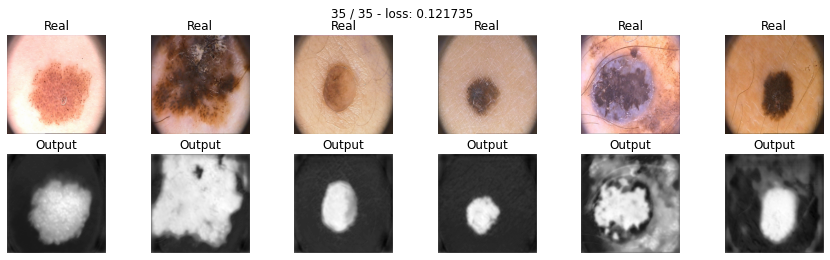

In [ ]:
unet2_bce_tr_loss, unet2_bce_val_loss = train(unet2_model, optim.Adam(unet2_model.parameters()), bce_loss, 35, data_tr, data_val)

In [ ]:
unet2_bce_val = score_model(unet2_model, iou_pytorch, data_val, 0.5)

In [ ]:
unet2_bce_tr = score_model(unet2_model, iou_pytorch, data_tr, 0.5)

Dice loss

In [ ]:
unet_dice = UNet().to(device)

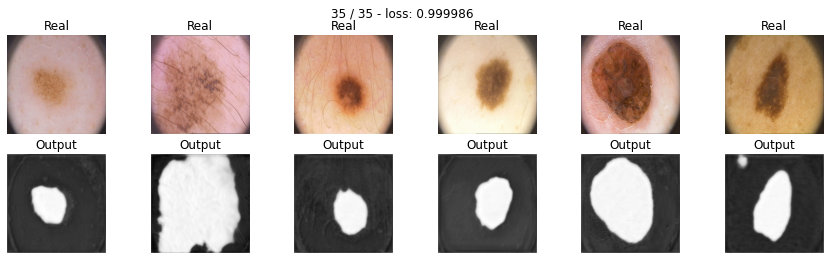

In [ ]:
unet_dice_tr_loss, unet_dice_val_loss = train(unet_dice, optim.Adam(unet_dice.parameters()), dice_loss, 35, data_tr, data_val)

In [ ]:
unet_dice_val = score_model(unet_dice, iou_pytorch, data_val, 0.5)

In [ ]:
unet_dice_tr = score_model(unet_dice, iou_pytorch, data_tr, 0.5)

In [ ]:
unet2_dice = UNet2().to(device)

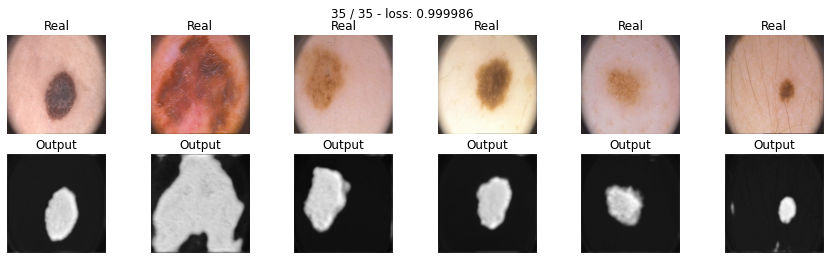

In [ ]:
unet2_dice_tr_loss, unet2_dice_val_loss = train(unet2_dice, optim.Adam(unet2_dice.parameters()), dice_loss, 35, data_tr, data_val)

In [ ]:
unet2_dice_val = score_model(unet2_dice, iou_pytorch, data_val, 0.5)

In [ ]:
unet2_dice_tr = score_model(unet2_dice, iou_pytorch, data_tr, 0.5)

Focal loss

In [ ]:
unet_focal = UNet().to(device)

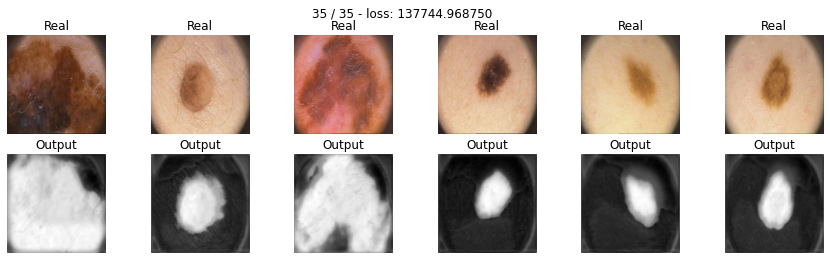

In [ ]:
unet_focal_tr_loss, unet_focal_val_loss = train(unet_focal, optim.Adam(unet_focal.parameters()), focal_loss, 35, data_tr, data_val)

In [ ]:
unet_focal_val = score_model(unet_focal, iou_pytorch, data_val, 0.5)

In [ ]:
unet_focal_tr = score_model(unet_focal, iou_pytorch, data_tr, 0.5)

In [ ]:
unet2_focal = UNet2().to(device)

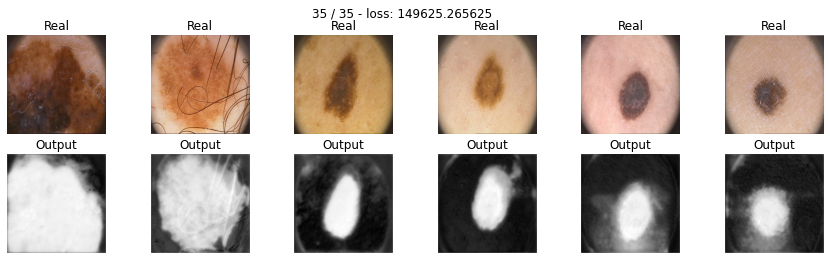

In [ ]:
unet2_focal_tr_loss, unet2_focal_val_loss = train(unet2_focal, optim.Adam(unet2_focal.parameters()), focal_loss, 35, data_tr, data_val)

In [ ]:
unet2_focal_val = score_model(unet2_focal, iou_pytorch, data_val, 0.5)

In [ ]:
unet2_focal_tr = score_model(unet2_focal, iou_pytorch, data_tr, 0.5)

Сделайте вывод, какая из моделей лучше

Последние модели(Unet) показывает хорошие результаты и визуально (по степени уверенности видны довольно логичные перепады) и по метрике лучше других справляется с валидационной выборкой.
Результаты рознятся от запуска, но в среднем около 0.7-0.76.
Хочу отметить также, что модель не сильно большая во всех вариациях(по числам карт активации после сверток), тк с большими моделями возникали проблемы с нехваткой памяти CUDA. 

# Отчет (6 баллов): 
Ниже предлагается написать отчет о проделанно работе и построить графики для лоссов, метрик на валидации и тесте. 
Если вы пропустили какую-то часть в задании выше, то вы все равно можете получить основную часть баллов в отчете, если правильно зададите проверяемые вами гипотезы.


Аккуратно сравните модели между собой и соберите наилучшую архитектуру. Проверьте каждую модель с различными лоссами. Мы не ограничиваем вас в формате отчета, но проверяющий должен отчетливо понять для чего построен каждый график, какие выводы вы из него сделали и какой общий вывод можно сделать на основании данных моделей. Если вы захотите добавить что-то еще, чтобы увеличить шансы получения максимального балла, то добавляйте отдельное сравнение.

Дополнительные комментарии: 

Пусть у вас есть N обученных моделей.
- Является ли отчетом N графиков с 1 линей? Да, но очень низкокачественным, потому что проверяющий не сможет сам сравнить их.

- Является ли отчетом 1 график с N линиями? Да, но скорее всего таким образом вы отразили лишь один эффект. Этого мало, чтобы сделать досточно суждений по поводу вашей работа.

- Я проверял метрики на трейне, и привел в результате таблицу с N числами, что не так? ключейвой момент тут, что вы измеряли на трейне ваши метрики, уверены ли вы, что заивисмости останутся такими же на отложенной выборке?

- Я сделал отчет содержащий график лоссов и метрик, и у меня нет ошибок в основной части, но за отчет не стоит максимум, почему? Естестественно максимум баллов за отчет можно получить не за 2 графика (даже при условии их полной правильности). Проверяющий хочет видеть больше сравнений моделей, чем метрики и лоссы (особенно, если они на трейне).

Советы: попробуйте правильно поставить вопрос на который вы себе отвечаете и продемонстрировать таблицу/график, помогающий проверяющему увидеть ответ на этот вопрос. Пример: Ваня хочет узнать, с каким из 4-х лоссов модель (например, U-Net) имеет наилучшее качество. Что нужно сделать Ване? Обучить 4 одинаковых модели с разными лосс функциями. И измерить итогововое качество. Продемонстрировать результаты своих измерений и итоговый вывод. (warning: конечно же, это не идеально ответит на наш вопрос, так как мы не учитываем в экспериментах возможные различные типы ошибок, но для первого приближения этого вполне достаточно).

Примерное время на подготовку отчета 1 час, он содержит сравнеение метрик, график лоссов, выбор лучших моделей из нескольких кластеров и выбор просто лучшей модели, небольшой вывод по всему дз, возможно сравнение результирующих сегментаций, времени или числа параметров модели, проявляйте креативность.

Посмотрим за изменением лосс функций в процессе обучения. 

In [ ]:
dct_losses = {"segnet_bce":   (seg_bce_tr_loss, seg_bce_val_loss),
              "segnet_dice":  (seg_dice_tr_loss, seg_dice_val_loss), 
              "segnet_focal": (seg_focal_tr_loss, seg_focal_val_loss),
              "unet_bce":     (unet_bce_tr_loss, unet_bce_val_loss),
              "unet_dice":    (unet_dice_tr_loss, unet_dice_val_loss),
              "unet_focal":   (unet_focal_tr_loss, unet_focal_val_loss),
              "unet2_bce":    (unet2_bce_tr_loss, unet2_bce_val_loss),
              "unet2_dice":   (unet2_dice_tr_loss, unet2_dice_val_loss),
              "unet2_focal":  (unet2_focal_tr_loss, unet2_focal_val_loss)}

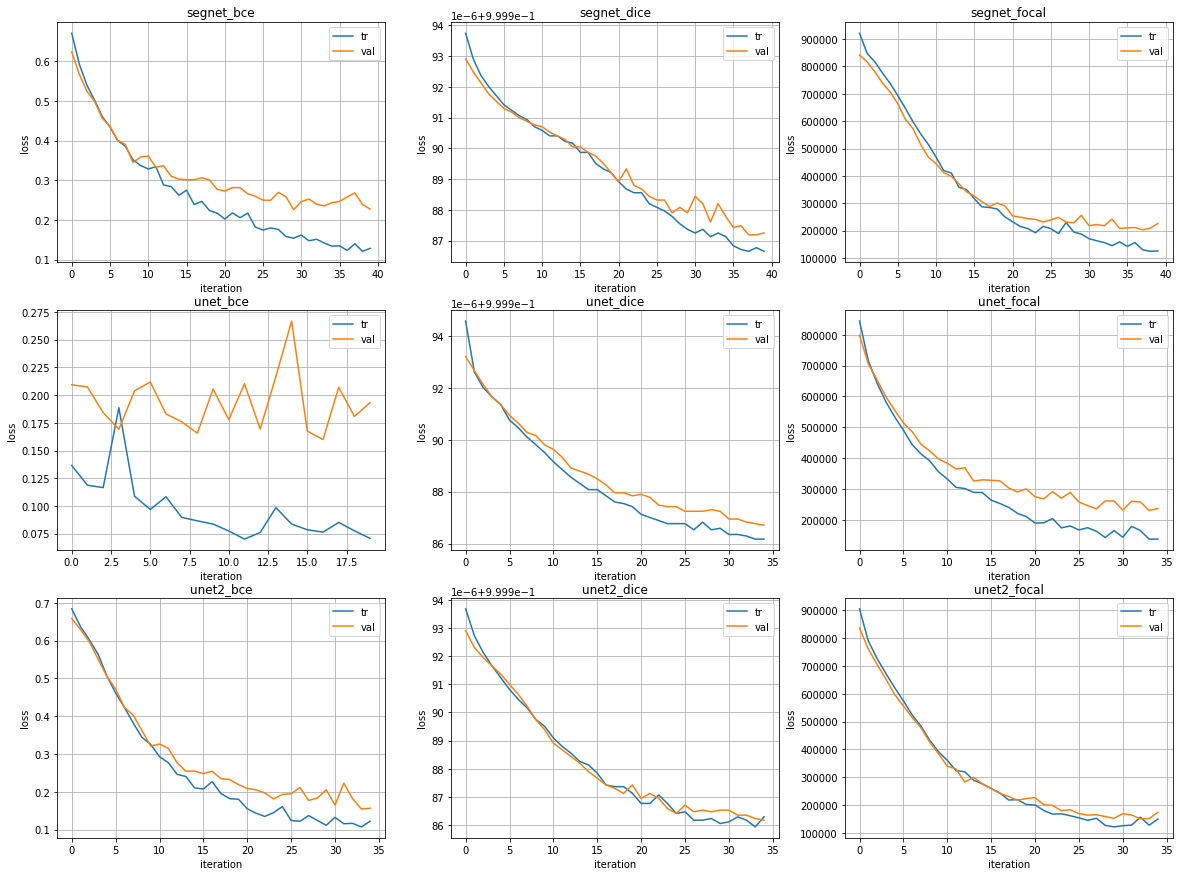

In [ ]:
clear_output(wait=True)
k = 1
plt.figure(figsize=(20, 15))
for title, losses in dct_losses.items():
  tr_losses, val_losses = losses
  plt.subplot(3, 3, k)
  plt.plot(np.arange(len(tr_losses)), tr_losses, label='tr')
  plt.plot(np.arange(len(tr_losses)), val_losses, label='val')
  plt.legend()
  plt.title(title)
  #plt.xticks([])
  #plt.yticks([])
  plt.xlabel('iteration')
  plt.ylabel('loss')
  plt.grid()
  k += 1
plt.show()

В целом нам не особо важна размерность оси лосса(вертикальная ось), мы смотрим на динамику лосс функций. В большинстве случаев динамика по итерациям выглядит неплохо. Немного странное только обучение при bce_loss в unet c обычным upsample(без convtranspose), тут лосс на трейне падает в то время, как на валидации лосс довольно сильно скачет, что говорит о не очень хорошем обучении(как мне кажется).

Тем не менее, переобучение есть. Его можно заметить на протяжении всего ноутбука. Там выводятся значения метрики на трейне и валидации и в целом видно, что на трейне метрика значительно выше(в среднем 0.8 по отношению к 0.66-0.7). Что говорит о переобучении модели. Скорее всего данных достаточно мало. Я также сделал модель на порядок проще в плане карт активаций на выходе слоев сверток, изначально размерность по каналам доходила до 512 к окончанию сonv слоев. Но модель все равно переобучается.

Попробую собрать все в 1 месте.

In [ ]:
dct_metrics = {"segnet_bce":   (seg_bce_tr, seg_bce_val),
              "segnet_dice":  (seg_dice_tr, seg_dice_val), 
              "segnet_focal": (seg_focal_tr, seg_focal_val),
              "unet_bce":     (unet_bce_tr, unet_bce_val),
              "unet_dice":    (unet_dice_tr, unet_dice_val),
              "unet_focal":   (unet_focal_tr, unet_focal_val),
              "unet2_bce":    (unet2_bce_tr, unet2_bce_val),
              "unet2_dice":   (unet2_dice_tr, unet2_dice_val),
              "unet2_focal":  (unet2_focal_tr, unet2_focal_val)}

In [ ]:
dct_metrics

{'segnet_bce': (0.8180000334978104, 0.6459999680519104),
 'segnet_dice': (0.7899999916553497, 0.6719999313354492),
 'segnet_focal': (0.7510000467300415, 0.6100000143051147),
 'unet_bce': (0.8549999892711639, 0.7199999988079071),
 'unet_dice': (0.8640000373125076, 0.6779999732971191),
 'unet_focal': (0.8040000051259995, 0.664000004529953),
 'unet2_bce': (0.8219999969005585, 0.6940000057220459),
 'unet2_dice': (0.8109999895095825, 0.6700000166893005),
 'unet2_focal': (0.726999968290329, 0.5999999791383743)}

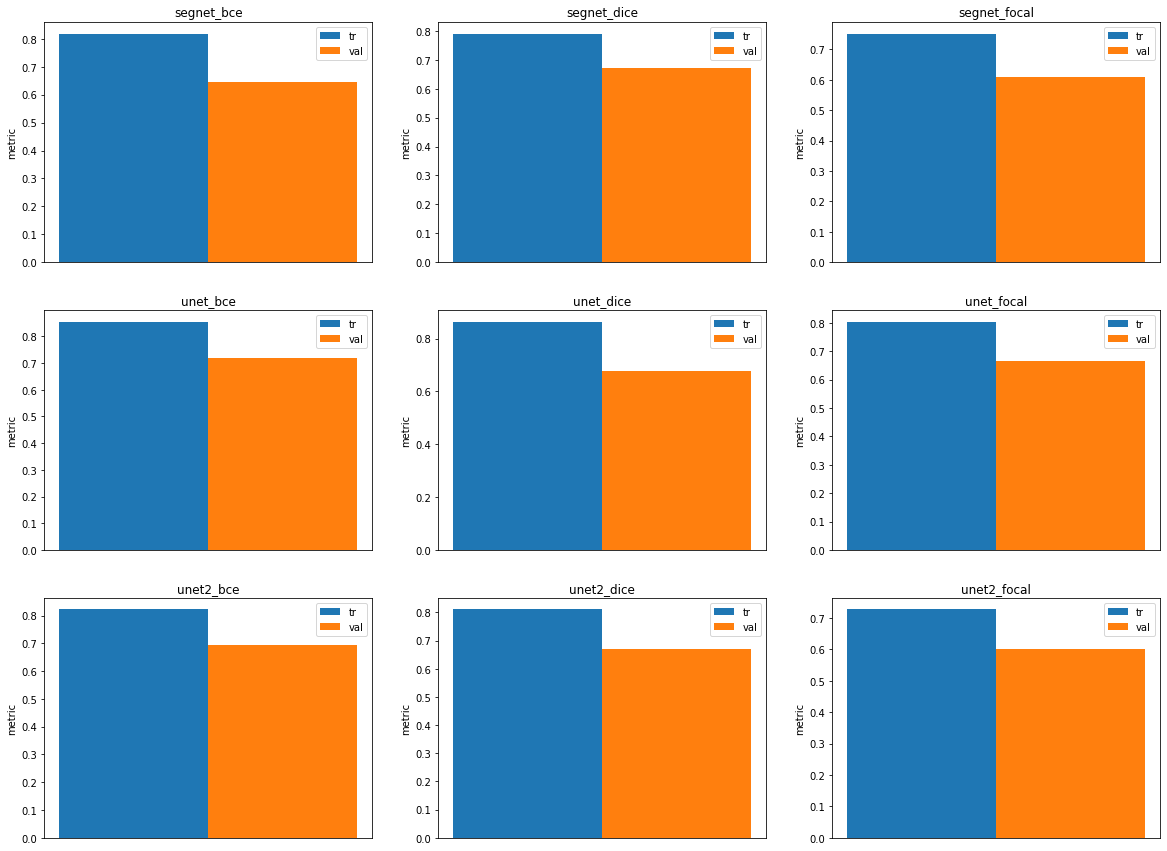

In [ ]:
clear_output(wait=True)
k = 1
plt.figure(figsize=(20, 15))
for title, scores in dct_metrics.items():
  tr_score, val_score = scores
  plt.subplot(3, 3, k)
  plt.bar(0.3, tr_score, 0.2, label='tr')
  plt.bar(0.5 ,val_score, 0.2, label='val')
  plt.legend()
  plt.title(title)
  plt.xticks([])
  #plt.yticks([])
  #plt.grid()
  plt.ylabel('metric')
  k += 1
plt.show()

Возможно тут графики немного излишне, но так более наглядно видно переобучение.

По значениям метрики можно заметить, что для segnet лучше подходит dice loss, а для unet, unet2 - bce. По значениям на валидации.

Сравним в среднем значения метрик для трех лоссов, чтобы понять какой из них в среднем лучше справляется. Сравнивать будем на валидации.

In [ ]:
print(f'AVERAGE BCE: {(seg_bce_val + unet_bce_val + unet2_bce_val)/3}')
print(f'AVERAGE DICE: {(seg_dice_val + unet_dice_val + unet2_dice_val)/3}')
print(f'AVERAGE FOCAL: {(seg_focal_val + unet_focal_val + unet2_focal_val)/3}')

AVERAGE BCE: 0.6866666575272878
AVERAGE DICE: 0.6733333071072897
AVERAGE FOCAL: 0.6246666659911474


Видно, что в среднем лучше справляется BCE. Да и не в среднем лучшая модель по качеству это Unet с BCE. Тут все зависит от запуска, бывало, что и Unet2 с BCE давал на валидации 0.76. Но BCE loss заметно лучше справляется с задачей.

Давайте проверим теперь зависимости на тесте(отложенной выборке).

In [ ]:
dct_test = {}

In [ ]:
dct_test['seg_bce_test'] = score_model(model, iou_pytorch, data_ts, 0.5)

In [ ]:
dct_test['seg_dice_test'] = score_model(model_dice, iou_pytorch, data_ts, 0.5)

In [ ]:
dct_test['seg_focal_test'] = score_model(model_focal, iou_pytorch, data_ts, 0.5)

In [ ]:
dct_test['unet_bce_test'] = score_model(unet_model, iou_pytorch, data_ts, 0.5)

In [ ]:
dct_test['unet_dice_test'] = score_model(unet_dice, iou_pytorch, data_ts, 0.5)

In [ ]:
dct_test['unet_focal_test'] = score_model(unet_focal, iou_pytorch, data_ts, 0.5)

In [ ]:
dct_test['unet2_bce_test'] = score_model(unet2_model, iou_pytorch, data_ts, 0.5)

In [ ]:
dct_test['unet2_dice_test'] = score_model(unet2_dice, iou_pytorch, data_ts, 0.5)

In [ ]:
dct_test['unet2_focal_test'] = score_model(unet2_focal, iou_pytorch, data_ts, 0.5)

In [ ]:
dct_test

{'seg_bce_test': 0.671999990940094,
 'seg_dice_test': 0.6739999949932098,
 'seg_focal_test': 0.562000036239624,
 'unet_bce_test': 0.7019999623298645,
 'unet_dice_test': 0.6880000233650208,
 'unet_focal_test': 0.69200000166893,
 'unet2_bce_test': 0.6720000505447388,
 'unet2_dice_test': 0.6279999613761902,
 'unet2_focal_test': 0.6500000059604645}

In [ ]:
print(f'AVERAGE BCE: {(dct_test["seg_bce_test"] + dct_test["unet_bce_test"] + dct_test["unet2_bce_test"])/3}')
print(f'AVERAGE DICE: {(dct_test["seg_dice_test"] + dct_test["unet_dice_test"] + dct_test["unet2_dice_test"])/3}')
print(f'AVERAGE FOCAL: {(dct_test["seg_focal_test"] + dct_test["unet_focal_test"] + dct_test["unet2_focal_test"])/3}')

AVERAGE BCE: 0.6820000012715658
AVERAGE DICE: 0.6633333265781403
AVERAGE FOCAL: 0.6346666812896729


В целом закономерности на тесте все те же, как и на валидации. Тут снова dice loss для segnet, но разница с bce совсем незначительная. А для Unet/Unet2 - bce.
В среднем опять же лучше bce. Самая лучшая модель unet с bce. 

Segnet немного быстрее обучается(порядка 50 секунд), чем вариации Unet. Но стоит также учитывать то, что я использовал MaxUnpool в Segnet, а в реализации Unet отошел от этой идеи. Unet и Unet2 обучаются примерно одинаково(в среднем 45 секунд на 35 итераций). Но все также зависит от запуска. Значения времени я брал по информации Google Colab при запуске.

Посмотрим на количество параметров моделей.

Segnet.

In [ ]:
sum(p.numel() for p in model.parameters())

240577

In [ ]:
sum(p.numel() for p in model.parameters() if p.requires_grad)

240577

240577 параметров(все из них обучаемые)

Unet

In [ ]:
sum(p.numel() for p in unet_model.parameters())

400705

In [ ]:
sum(p.numel() for p in unet_model.parameters() if p.requires_grad)

400705

400705 параметров. Также все обучаются. Что логично, тк мы ничего не замораживали.

In [ ]:
sum(p.numel() for p in unet2_model.parameters())

471665

In [ ]:
sum(p.numel() for p in unet2_model.parameters() if p.requires_grad)

471665

471665 параметров. Снова нет замороженных.

Сложность(если мерить ее по количеству параметров). Как мы видим возрастает.

Выводы: 
Как мы видим практически все модели с любыми лосами переобучаются. Скорее всего это связано с небольшим обьемом обучающей выборки.(Можно было, наверное, провести аугментацию, с соответствующими преобразованиями и для конечного выхода(например если исходня картинка поворачивается, то поворачивается и результат)).

В плане времени обучения для всех моделей различия практически незначительные. Количество обучаемых параметров растет в непосредственном порядке Segnet, Unet, Unet2.

Для Segnet лучше подходит dice loss (на данной задаче, при конкретном запуске). Различия тут незначительные. Для вариаций Unet лучше bce loss. В среднем также лучше bce.
Лучшая модель по метрике Unet с bce loss.

Хочу заметить,что я не использовал в сравнении дополнительные лоссы. Так как они не очень хорошо себя показывают. Все попытался описать в непосредственном блоке по их реализации. Скорее всего, моя реализация не очень хорошо работает, но я честно пытался разобраться и написал, то, как я понял :( 